In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para estimar regresión
import statsmodels.formula.api as sm

# Libreria para normalizar
from sklearn.preprocessing import StandardScaler

**OBJETIVO**

Predecir la probabilidad de que una persona padezca un problema cardíaco en base a su estado de salud en general, diferenciando si es hombre o mujer 

**CONTEXTO PROFESIONAL**

El área de Cardiología de la Clínica Pergamino se encuentra analizando, a partir de historias médicas de distintos pacientes que fueron atendidos en los consultorios, qué tan probable puede ser que haya muchos pacientes potenciales a sufrir problemas de corazón. 


**PROBLEMÁTICA DEL ÁREA**

Para poder estar lo mejor preparados e invertir en tecnologías que ayuden a intervenir a pacientes con problemas cardiovasculares, es necesario obtener la probabilidad de que existan potenciales personas riesgosas a tener dicha afección. 

**CONTEXTO ANALÍTICO**

Se cuenta con la siguiente información: 
    
* Salud_general
* Último control realizado
* Ejercicio
* Enfermedad del corazón preexistente
* Cáncer de piel
* Otro cáncer
* Depresión
* Diabetes
* Artritis
* Sexo
* Categoría de edad
* Altura (cm)
* Peso (kg)
* IMC
* Historial de tabaquismo
* Consumo de alcohol
* Consumo de frutas
* Consumo de verduras verdes
* Consumo de papas fritas

# Paso 1: Carga del data frame y primera exploración

In [10]:
# Carga del dataset
df = pd.read_csv('CVD_cleaned.csv')

df = pd.read_csv('CVD_cleaned.csv', sep = ',')



In [11]:
# Mostrar las primeras filas del dataframe
print(df.head())



  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

In [12]:
# Obtener información básica del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [13]:
# Estadísticas descriptivas
print(df.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

In [14]:
# Comprobar valores faltantes
print(df.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


# Paso 2: Preprocesamiento de Datos

Limpieza de Datos: Chequear valores faltantes y posibles errores en los datos.

In [15]:
# Eliminar o imputar valores faltantes

df = df.dropna() 

In [16]:
# Reemplazar "Yes" con 1 y "No" con 0 en las columnas especificadas
columns_to_convert = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis']

# Reemplazar "Yes" por 1 y "No" por 0
df[columns_to_convert] = df[columns_to_convert].replace({'Yes': 1, 'No': 0})

# Verificar los cambios
print(df.head())

  General_Health                  Checkup  Exercise  Heart_Disease  \
0           Poor  Within the past 2 years         0              0   
1      Very Good     Within the past year         0              1   
2      Very Good     Within the past year         1              0   
3           Poor     Within the past year         1              1   
4           Good     Within the past year         0              0   

   Skin_Cancer  Other_Cancer  Depression Diabetes  Arthritis     Sex  \
0            0             0           0        0          1  Female   
1            0             0           0        1          0  Female   
2            0             0           0        1          0  Female   
3            0             0           0        1          0    Male   
4            0             0           0        0          0    Male   

  Age_Category  Height_(cm)  Weight_(kg)    BMI Smoking_History  \
0        70-74        150.0        32.66  14.54             Yes   
1        70-

C:\Users\adric\AppData\Local\Temp\ipykernel_15816\656848988.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({'Yes': 1, 'No': 0})


In [17]:
# Seleccionar características y variable objetivo
X = df[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
        'Depression', 'Diabetes', 'Arthritis', 'Height_(cm)', 'Weight_(kg)', 
        'BMI', 'Smoking_History','Alcohol_Consumption', 'Fruit_Consumption', 
        'Green_Vegetables_Consumption', 'FriedPotato_Consumption','Sex', 'Age_Category']]

y = df['Heart_Disease']

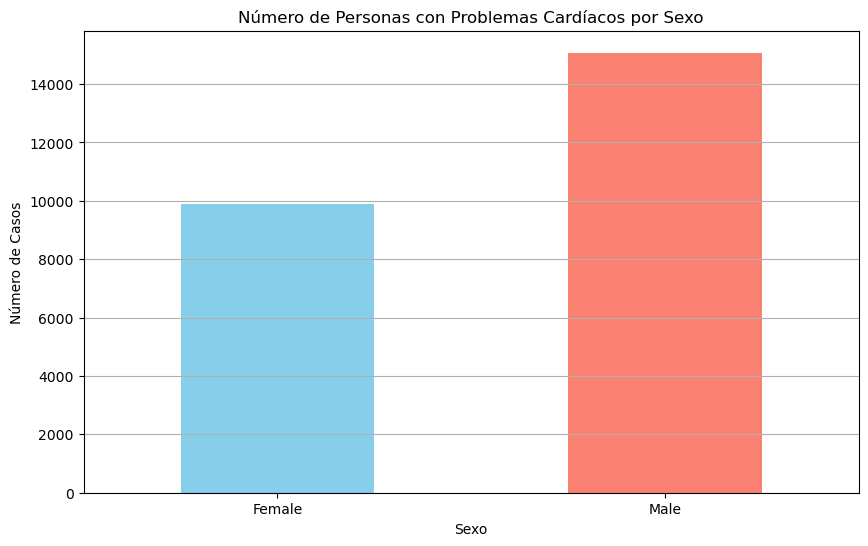

In [18]:
# Contar el número de casos de enfermedad cardíaca por sexo
sex_heart_disease_counts = df.groupby('Sex')['Heart_Disease'].sum()

plt.figure(figsize=(10, 6))
sex_heart_disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Número de Personas con Problemas Cardíacos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [19]:
# Contar el número de casos con problemas cardíacos (Heart_Disease == 1) por sexo
heart_disease_counts = df[df['Heart_Disease'] == 1].groupby('Sex').size()

# Contar el número de casos sin problemas cardíacos (Heart_Disease == 0) por sexo
no_heart_disease_counts = df[df['Heart_Disease'] == 0].groupby('Sex').size()

# Mostrar los resultados
print("Número de personas con problemas cardíacos por sexo:")
print(heart_disease_counts)
print("\nNúmero de personas sin problemas cardíacos por sexo:")
print(no_heart_disease_counts)

Número de personas con problemas cardíacos por sexo:
Sex
Female     9898
Male      15073
dtype: int64

Número de personas sin problemas cardíacos por sexo:
Sex
Female    150298
Male      133585
dtype: int64


<Figure size 1200x800 with 0 Axes>

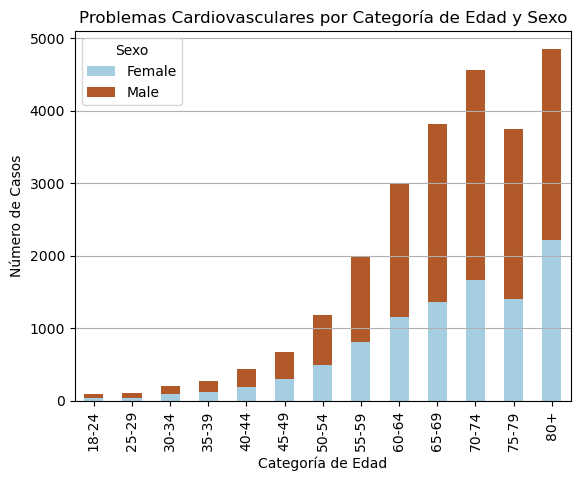

In [20]:
# Conteo de casos de enfermedad cardíaca por categoría de edad y sexo
age_sex_heart_disease_counts = df[df['Heart_Disease'] == 1].groupby(['Age_Category', 'Sex']).size().unstack()

plt.figure(figsize=(12, 8))
age_sex_heart_disease_counts.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Problemas Cardiovasculares por Categoría de Edad y Sexo')
plt.xlabel('Categoría de Edad')
plt.ylabel('Número de Casos')
plt.legend(title='Sexo')
plt.grid(axis='y')
plt.show()

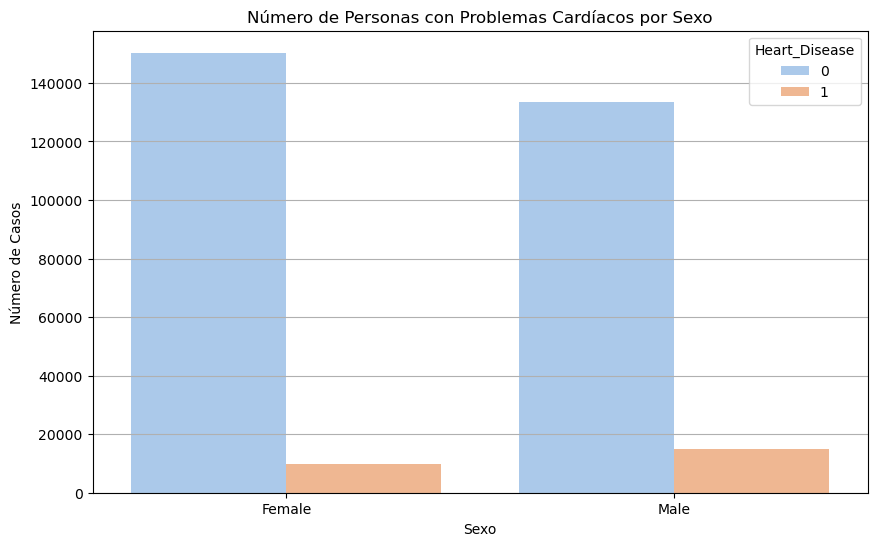

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Heart_Disease', data=df, palette='pastel')
plt.title('Número de Personas con Problemas Cardíacos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.grid(axis='y')
plt.show()

**Primera Conclusión**

El análisis de los gráficos generados a partir del DataFrame revela que la incidencia de problemas cardíacos es notablemente más alta en el sexo masculino. En particular, se observa que esta incidencia aumenta de manera significativa en los rangos de edad a partir de los 60 años. A medida que se avanza en la edad, la frecuencia de problemas cardíacos se eleva progresivamente, indicando una mayor vulnerabilidad a estos problemas en los hombres de edad avanzada.

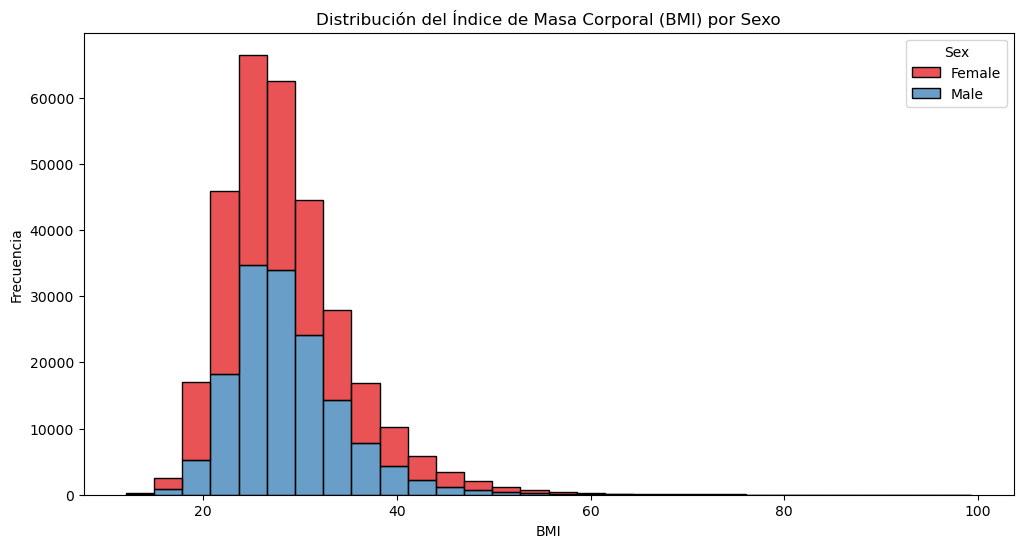

In [22]:
# Distribución del Índice de Masa Corporal (BMI) para hombres y mujeres, diferenciando si tienen problemas cardíacos o no.


plt.figure(figsize=(12, 6))
sns.histplot(df, x='BMI', hue='Sex', multiple='stack', bins=30, palette='Set1')
plt.title('Distribución del Índice de Masa Corporal (BMI) por Sexo')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\adric\AppData\Local\Temp\ipykernel_15816\1935315143.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y='Green_Vegetables_Consumption', data=df, palette='coolwarm')


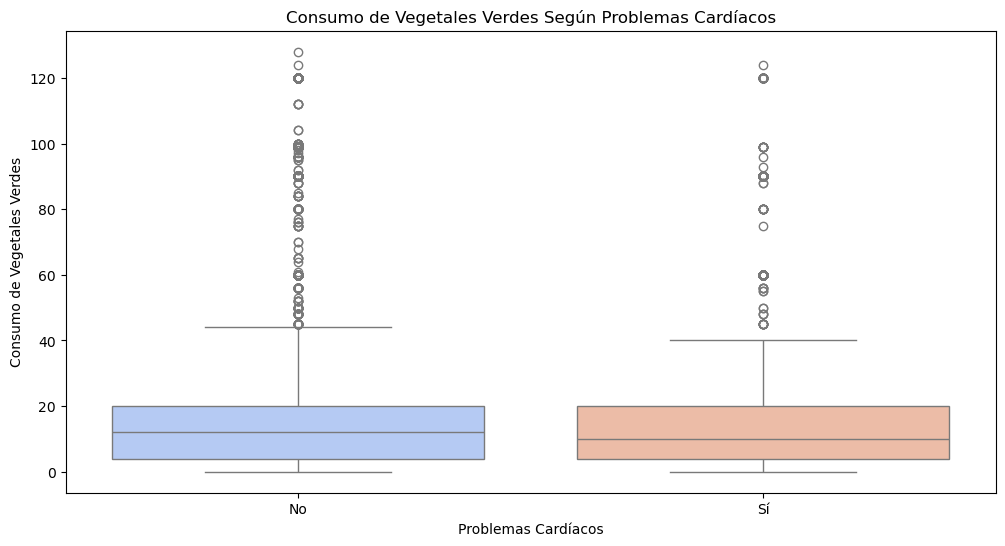

In [23]:
# Distribución del consumo de vegetales verdes para personas sin y con problemas cardíacos

plt.figure(figsize=(12, 6))
sns.boxplot(x='Heart_Disease', y='Green_Vegetables_Consumption', data=df, palette='coolwarm')
plt.title('Consumo de Vegetales Verdes Según Problemas Cardíacos')
plt.xlabel('Problemas Cardíacos')
plt.ylabel('Consumo de Vegetales Verdes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\adric\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)


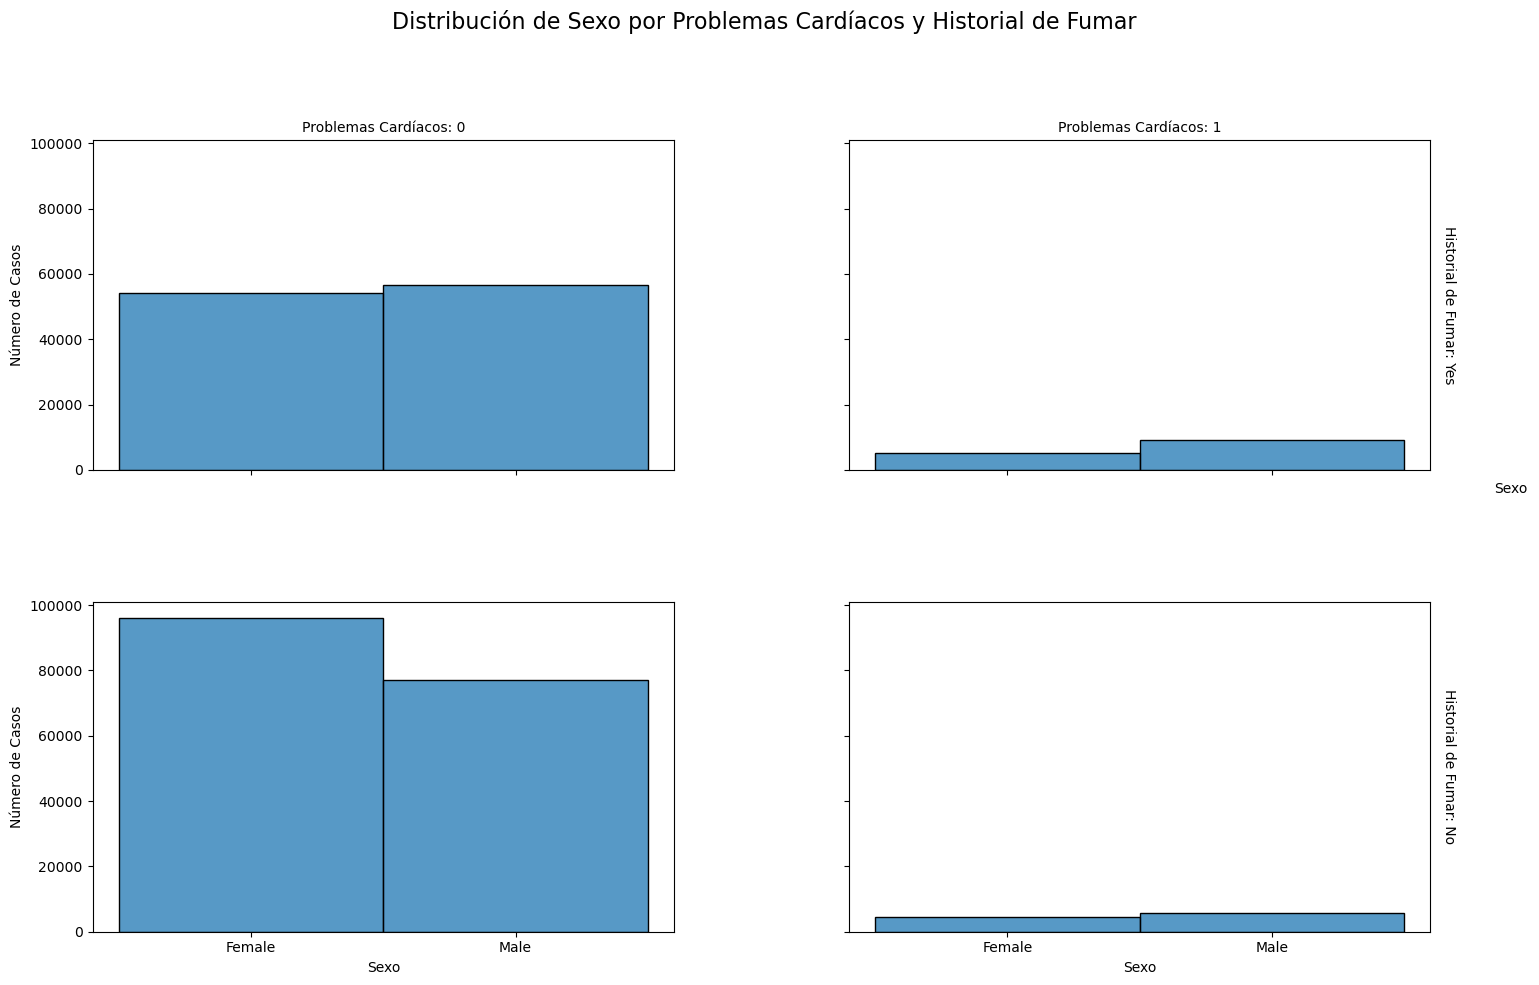

In [24]:
# Crear el FacetGrid con filas para 'Smoking_History' y columnas para 'Heart_Disease'
g = sns.FacetGrid(df, col='Heart_Disease', row='Smoking_History', margin_titles=True,
                  height=5, aspect=1.5, despine=False, sharex=True, sharey=True)

# Mapear histogramas de la variable 'Sex'
g.map(sns.histplot, 'Sex', discrete=True, bins=2, palette='coolwarm')

# Ajustar títulos y etiquetas
g.set_axis_labels('Sexo', 'Número de Casos')
g.set_titles(col_template="Problemas Cardíacos: {col_name}", row_template="Historial de Fumar: {row_name}")
g.add_legend(title='Sexo')

# Ajustar los márgenes para evitar la superposición
plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.3)  

# Ajustar el título general
g.fig.suptitle('Distribución de Sexo por Problemas Cardíacos y Historial de Fumar', fontsize=16)

plt.show()

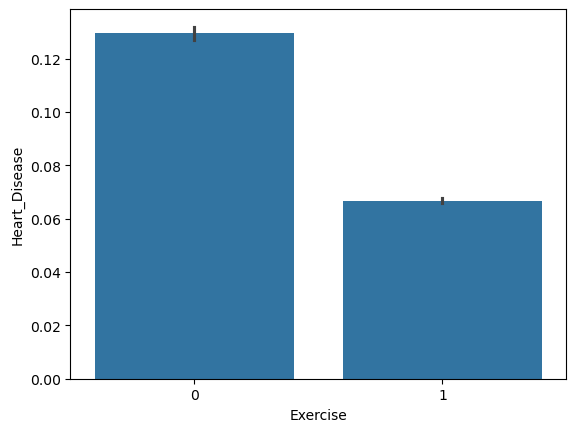

In [25]:
plt.figure()
sns.barplot(data = df, 
            x='Exercise',
            y='Heart_Disease')
plt.show()

**Segunda Conclusión**

El análisis de los gráficos revela que, aunque inicialmente observamos que la incidencia de problemas cardíacos es significativamente mayor en los hombres, esta no muestra una relación directa con el historial de tabaquismo, tanto en hombres como en mujeres. Sin embargo, se identifica una relación clara con la práctica de ejercicio físico. Los datos muestran que los problemas cardíacos aumentan de manera exponencial en las personas que no realizan ejercicio, siendo casi el doble de frecuentes en comparación con aquellos que llevan una rutina de actividad física regular.
También observamos, que existe una relación entre el alto consumo de vegetales verdes, para personas que no sufren problemas cardíacos (el nitrato vegetal que predomina en las verduras de hoja verde puede mejorar la salud cardiovascular) en oposición a aquellas que consumen en menor cantidad y tienen más dificultades respecto de su salud cardiológica. 


C:\Users\adric\AppData\Local\Temp\ipykernel_15816\248900848.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(['Sex', 'BMI_Category', 'Heart_Disease']).size().reset_index(name='Count')
C:\Users\adric\AppData\Local\Temp\ipykernel_15816\248900848.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=count_data, x='BMI_Category', y='Count', hue='Sex',


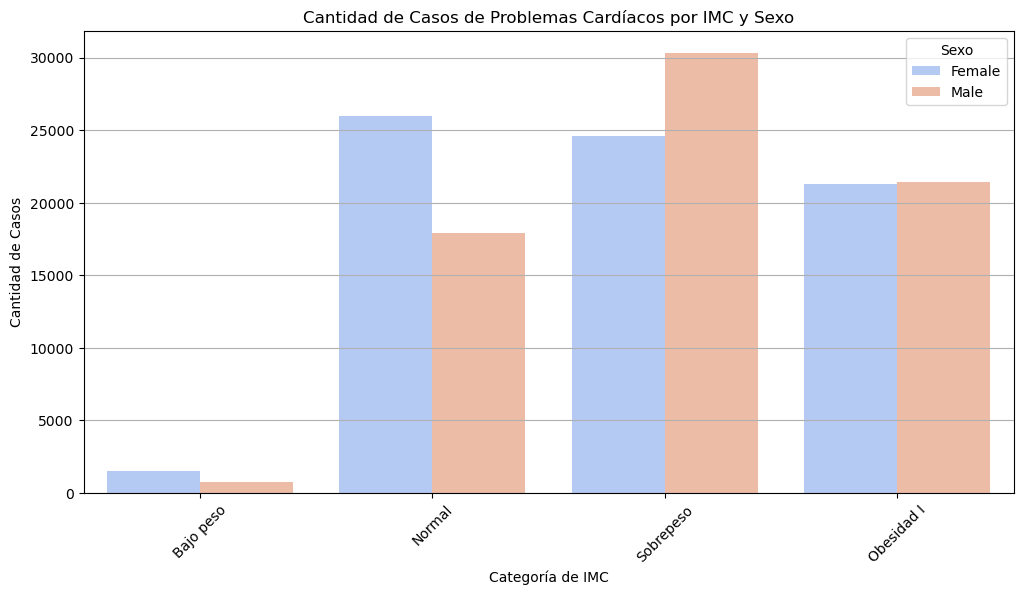

In [26]:
# Crear una nueva columna categorizando el IMC
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 39], 
                             labels=['Bajo peso', 'Normal', 'Sobrepeso', 'Obesidad I'])

# Contar casos de problemas cardíacos por sexo e IMC
count_data = df.groupby(['Sex', 'BMI_Category', 'Heart_Disease']).size().reset_index(name='Count')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=count_data, x='BMI_Category', y='Count', hue='Sex', 
            palette='coolwarm', ci=None)

# Configurar el gráfico
plt.title('Cantidad de Casos de Problemas Cardíacos por IMC y Sexo')
plt.xlabel('Categoría de IMC')
plt.ylabel('Cantidad de Casos')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

**Tercera Conclusión**

A su vez, luego de realizar el gráfico que determina la cantidad de casos de personas con problemas cardíacos dependiendo de su IMC, podemos determinar que en el caso de los hombres, la predominancia de casos radica en aquellos en los que su IMC está por encima del rango normal, en sobrepeso. Mientras que en las mujeres no varía significativamente la cantidad de casos entre un IMC normal y uno con sobrepeso, pudiendo así entender que dentro del género femenino, la variable del peso no es un determinante a la hora de evaluar posibles problemas cardiovasculares. 

# Paso 3: Análisis Exploratorio de Datos (EDA)



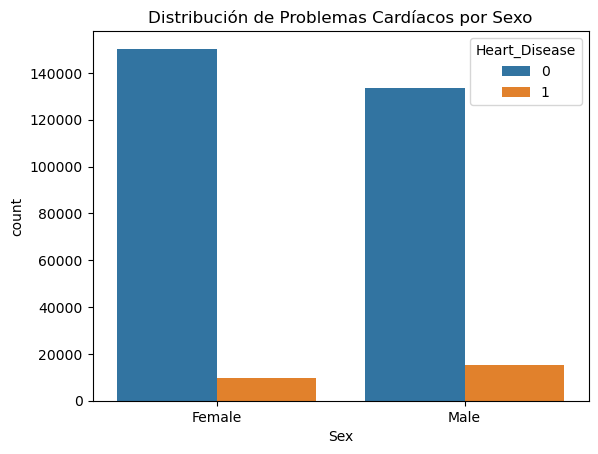

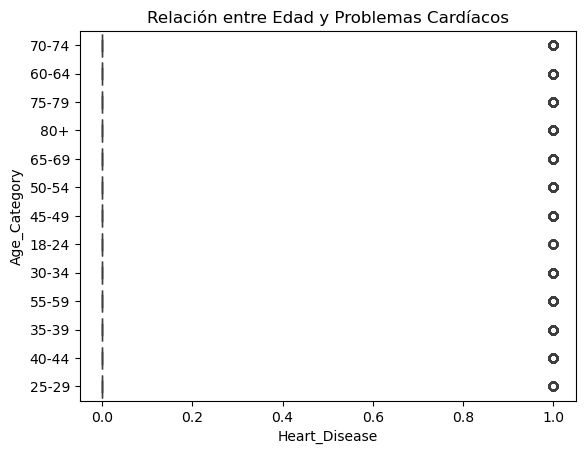

In [27]:
# Visualización de la distribución de problemas cardíacos según el sexo
sns.countplot(x='Sex', hue='Heart_Disease', data=df)
plt.title('Distribución de Problemas Cardíacos por Sexo')
plt.show()

# Análisis de edad y problemas cardíacos
sns.boxplot(x='Heart_Disease', y='Age_Category', data=df)
plt.title('Relación entre Edad y Problemas Cardíacos')
plt.show()

Se realizan dos visualizaciones. La primera muestra la distribución de problemas cardíacos según el sexo, y la segunda explora la relación entre la categoría de edad y la incidencia de problemas cardíacos. Estas visualizaciones ayudan a entender las tendencias y patrones en los datos.

# Paso 4: Feature Selection

In [28]:
from sklearn.model_selection import train_test_split  # Asegúrate de incluir esta línea
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectFromModel

In [32]:
# Convertir columnas categóricas a variables dummy
data = pd.get_dummies(df, drop_first=True)

# Definir características (X) y variable objetivo (y)
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

# Verificar que X no contenga valores no numéricos
print(X.dtypes)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Exercise                                                 int64
Skin_Cancer                                              int64
Other_Cancer                                             int64
Depression                                               int64
Arthritis                                                int64
Height_(cm)                                            float64
Weight_(kg)                                            float64
BMI                                                    float64
Alcohol_Consumption                                    float64
Fruit_Consumption                                      float64
Green_Vegetables_Consumption                           float64
FriedPotato_Consumption                                float64
General_Health_Fair                                       bool
General_Health_Good                                       bool
General_Health_Poor                                       bool
General_Health_Very Good                               

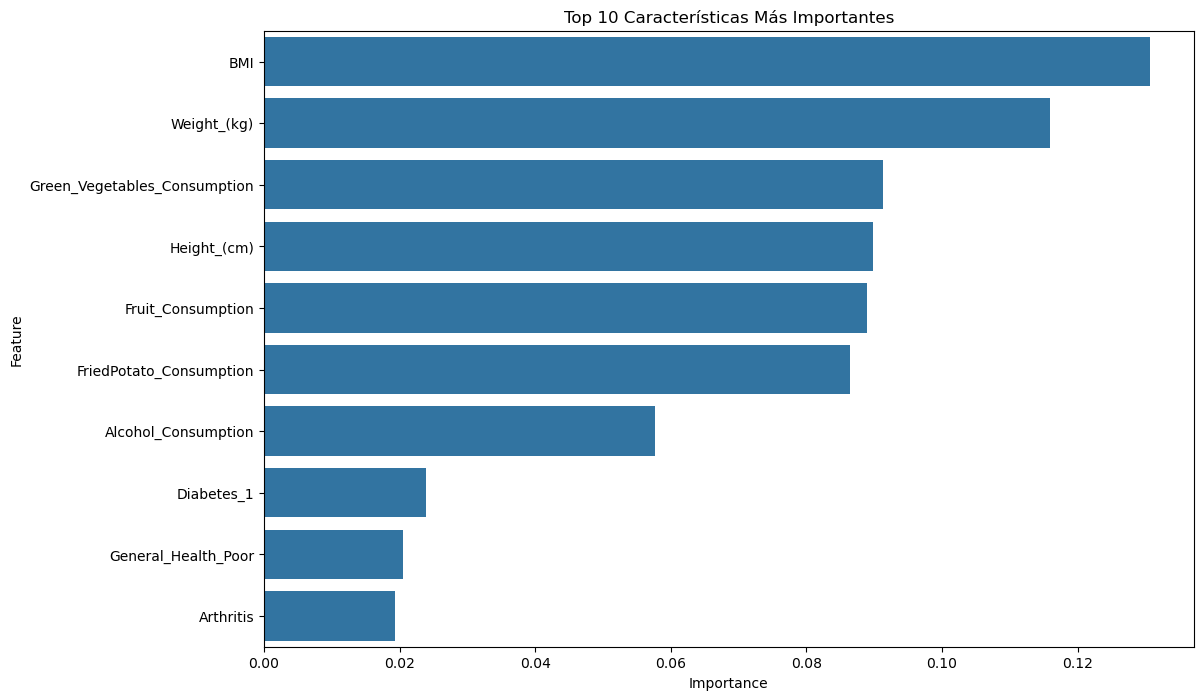

In [33]:
# Definir características (X) y variable objetivo (y)
X = data.drop('Heart_Disease', axis=1)  # Variable objetivo
y = data['Heart_Disease']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest para calcular la importancia de las características
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Obtener la importancia de las características
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Características Más Importantes')
plt.show()

En este bloque, se definen las características (X) y la variable objetivo (y). Luego, se divide el dataset en conjuntos de entrenamiento y prueba. Se entrena un modelo para calcular la importancia de las características y se crea un DataFrame que muestra esta información. Finalmente, se visualizan las 10 características más importantes. Esto ayuda a identificar qué factores son más relevantes para la predicción de problemas cardíacos.

# Paso 5: Entrenamiento del Modelo

In [35]:
# Selección de características utilizando la importancia media
selector = SelectFromModel(rf, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Entrenar el modelo con Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

c:\Users\adric\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\adric\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


RandomForestClassifier(random_state=42)

Se utilizan las características más importantes para entrenar el modelo. Se aplica SelectFromModel para seleccionar las características con una importancia superior a la media. Luego, se escalan los datos para mejorar la convergencia del modelo y se entrena nuevamente el modelo de Random Forest con los datos escalados.

# Paso 6: Evaluación del Modelo

In [36]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de rendimiento
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Calcular AUC-ROC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f'AUC-ROC: {roc_auc:.2f}')

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     56774
           1       0.11      0.02      0.03      4997

    accuracy                           0.91     61771
   macro avg       0.52      0.50      0.49     61771
weighted avg       0.85      0.91      0.88     61771

Matriz de Confusión:
 [[56159   615]
 [ 4919    78]]
AUC-ROC: 0.56


Análisis del Reporte de Clasificación
Precision:

Para la clase 0 (sin enfermedad cardíaca): 0.92, lo que indica que el 92% de las predicciones de esta clase son correctas.
Para la clase 1 (con enfermedad cardíaca): 0.11, lo que indica que solo el 11% de las predicciones de esta clase son correctas. Esto sugiere que el modelo tiene dificultades para identificar correctamente a los pacientes con enfermedad cardíaca.
Recall:

Para la clase 0: 0.99, significa que el modelo detecta el 99% de todos los casos verdaderos negativos.
Para la clase 1: 0.02, lo que indica que solo el 2% de los pacientes con enfermedad cardíaca son identificados correctamente por el modelo. Esto es bastante bajo y es un motivo de preocupación.
F1-Score:

Para la clase 0: 0.95, indica un buen equilibrio entre precisión y recall.
Para la clase 1: 0.03, lo que refuerza que el modelo no está funcionando bien para esta clase.
Accuracy:

La precisión general del modelo es del 91%. Sin embargo, esta cifra puede ser engañosa debido al desbalance en las clases, donde hay muchas más instancias de la clase 0 que de la clase 1.
AUC-ROC:

Un valor de 0.56 sugiere que el modelo tiene un rendimiento apenas mejor que el azar en distinguir entre las dos clases. Esto indica que hay mucho margen para mejorar.
Matriz de Confusión
Verdaderos Negativos (TN): 56159, es decir, el modelo predijo correctamente que estas personas no tienen enfermedad cardíaca.
Falsos Positivos (FP): 615, el modelo predijo que estas personas tienen enfermedad cardíaca, pero en realidad no la tienen.
Falsos Negativos (FN): 4919, el modelo no identificó a estos pacientes con enfermedad cardíaca.
Verdaderos Positivos (TP): 78, el modelo identificó correctamente a estas personas como enfermas.
Conclusiones
Desbalance de Clases: El gran desbalance entre las clases 0 y 1 (muchas más instancias de 0) está afectando el rendimiento del modelo. La mayoría de los modelos de machine learning se ven influenciados por la clase mayoritaria.

Mejoras Necesarias:

Técnicas de Muestreo: Considera usar técnicas como sobremuestreo (SMOTE) para la clase minoritaria o submuestreo de la clase mayoritaria.
Modelos Alternativos: Explora otros algoritmos de clasificación que puedan manejar mejor los desbalances, como árboles de decisión con penalización para clases desbalanceadas.
Ajuste de Umbral: Ajustar el umbral de decisión para mejorar la detección de la clase 1.
Evaluación Adicional: Considera también utilizar otras métricas como la curva PR (Precisión-Recall) para una evaluación más detallada de la clase minoritaria.

In [37]:
# Manejo del Desbalance de Clases
# Sobremuestreo de la Clase Minoritaria


from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir el conjunto de datos balanceado en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
# Submuestreo de la Clase Mayoritaria

from sklearn.utils import resample

# Combinar las clases
data = pd.concat([X, y], axis=1)

# Separar las clases
majority = data[data['Heart_Disease'] == 0]
minority = data[data['Heart_Disease'] == 1]

# Submuestrear la clase mayoritaria
majority_downsampled = resample(majority, 
                                 replace=False,     # no reemplazar
                                 n_samples=len(minority),    # igualar al tamaño de la clase minoritaria
                                 random_state=42)  # reproducible

# Combinar de nuevo
downsampled = pd.concat([majority_downsampled, minority])

# Definir X e y
X = downsampled.drop('Heart_Disease', axis=1)
y = downsampled['Heart_Disease']

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Probar Diferentes Modelos

from xgboost import XGBClassifier

# Inicializar el clasificador
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entrenar el modelo
xgb.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb.predict(X_test)

c:\Users\adric\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:55:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [41]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      4989
           1       0.74      0.77      0.75      5000

    accuracy                           0.75      9989
   macro avg       0.75      0.75      0.75      9989
weighted avg       0.75      0.75      0.75      9989



In [42]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir el grid de parámetros a evaluar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]  # Para manejar el desbalance
}

# Configurar GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', verbose=1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor conjunto de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores hiperparámetros: {'class_weight': None, 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}


In [44]:
# Evaluación del Modelo

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predicciones
y_pred = grid_search.best_estimator_.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      4989
           1       0.73      0.80      0.76      5000

    accuracy                           0.75      9989
   macro avg       0.75      0.75      0.75      9989
weighted avg       0.75      0.75      0.75      9989

Matriz de Confusión:
[[3535 1454]
 [1020 3980]]
AUC-ROC: 0.7522794147123673


Reporte de Clasificación
Clase 0 (sin problemas cardíacos)
Precision: 0.78

Esto significa que el 78% de las veces que el modelo predice que una persona no tiene problemas cardíacos, efectivamente no los tiene. Este valor es bastante bueno.
Recall: 0.71

El modelo identifica correctamente el 71% de las personas que realmente no tienen problemas cardíacos. Esto es aceptable, pero hay margen para mejorar.
F1-Score: 0.74

Este valor indica un buen equilibrio entre precisión y recall para esta clase.
Support: 4,989

Hay 4,989 instancias de personas sin problemas cardíacos en el conjunto de prueba.
Clase 1 (con problemas cardíacos)
Precision: 0.73

El 73% de las predicciones del modelo sobre problemas cardíacos son correctas. Esto es bastante sólido.
Recall: 0.80

El modelo identifica correctamente el 80% de las personas que realmente tienen problemas cardíacos. Este es un buen resultado, especialmente en un contexto clínico.
F1-Score: 0.76

Un buen valor, que indica que el modelo está funcionando bien en esta clase también.
Support: 5,000

Hay 5,000 instancias de personas con problemas cardíacos en el conjunto de prueba.
Accuracy Total
Accuracy: 0.75
Esto significa que el 75% de las predicciones del modelo son correctas en general. Esto es un resultado razonable, especialmente dado el contexto del problema.

AUC-ROC
AUC-ROC: 0.75
Un AUC de 0.75 indica que el modelo tiene un buen rendimiento. En general, un AUC entre 0.7 y 0.8 se considera aceptable y muestra que el modelo puede discriminar entre las clases mejor que el azar.

Conclusiones

Mejora General: Comparado con los resultados anteriores, el modelo ha mejorado en términos de precisión, recall y F1-score, tanto para la clase negativa como para la positiva.

Desbalance Manejado: Aunque todavía hay falsos positivos, el modelo parece manejar mejor el desbalance de clases, logrando una buena detección de la clase positiva.

Siguiente Paso: Podrías explorar más ajustes de hiperparámetros o considerar el uso de técnicas como SMOTE para aumentar las instancias de la clase minoritaria y mejorar aún más el rendimiento del modelo.

Evaluación en Contexto Clínico: Dado que los falsos negativos son críticos en la detección de problemas cardíacos, sería importante seguir mejorando el recall para la clase positiva.